<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1RsYxRtAjx392OSk9kSK9LlEvZkllXDG0" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [3]:
# Antes de empezar, vamos a cargar los datos en el ordenador.

#!wget -q "https://www.puentescalvo.com/DATA/Salary_dataset.csv" -O "data/Salary_dataset.csv"

# miramos si realmente lo ha cargado

!ls -l data/*.csv

-rw-r--r-- 1 roberto roberto 1423529 may  3  2016 data/housing.csv
-rw-rw-r-- 1 roberto roberto     664 sep 12  2023 data/Salary_dataset.csv


# Regresión lineal de una variable

**En primer lugar, leemos los datos**

In [5]:
import pandas as pd

data = pd.read_csv("data/Salary_dataset.csv", index_col=0)
data

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


**Como vamos a hacer una regresión lineal de sólo una variable, sólo dos columnas: la columna independiente y la dependiente**

La columna sin nombre y con númneros consecutivos contiene los *identificadores* de las filas: file 0, 1, 2 ... 29

Es una columna, pero tiene un tratamiento especial, igual que la fila de los nombres de las columnas.

Bien, ya tenemos los datos. Vamos a formular el problema: lo que queremos es **crear un modelo que, a partir de la experiencia en años de una persona en un puesto de trabajo, prediga su salario**.

Evidentemente vamos a cometer un error. Sólo con los años de experiencia no podemos *adivinar* el salario de la persona, pero podemos estimarla respecto a lo que los datos nos enseñan. Y ahí está el aprendizaje.

Los datos nos dan una muestra de la realidad y nosotros vamos a crear un modelo muy simple que va a <u>generalizar</u> esa realidad. Al aplicar el modelo a nuevos datos (años de experiencia), obtendremos el salario que debería tener la persona <u>según los datos</u>.

Matemáticamente queremos obtener esto:

$$ A*x + B = y $$

Una línea que se va a ajustar a los datos de entrenamiento.

**El modelo va a estar formada por esa fórmula y los parámetros del modelo son $A$ y $B$**.

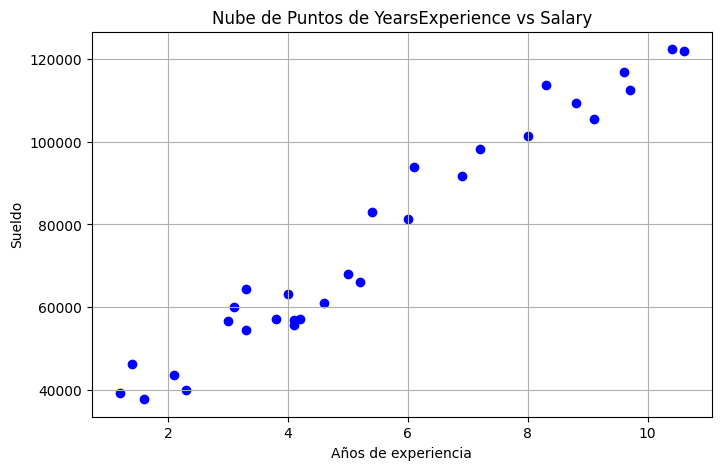

In [6]:
import matplotlib.pyplot as plt

# Crear el gráfico
plt.figure(figsize=(8, 5))  # Tamaño del gráfico
plt.scatter(data['YearsExperience'], data['Salary'], c='blue')  # Nube de puntos
plt.title('Nube de Puntos de YearsExperience vs Salary')  # Título del gráfico
plt.xlabel('Años de experiencia')  # Etiqueta del eje x
plt.ylabel('Sueldo')  # Etiqueta del eje y
plt.grid(True)  # Agregar una cuadrícula
plt.show()  # Mostrar el gráfico

¿Ves un patrón en los puntos formados por ambas variables?

¿Observas que podrías trazar un a línea que - más o menos - se ajustase al patrón de puntos?

Vamos a calcular $A$ y $B$ usando una librería muy usada en aprendizaje automático.

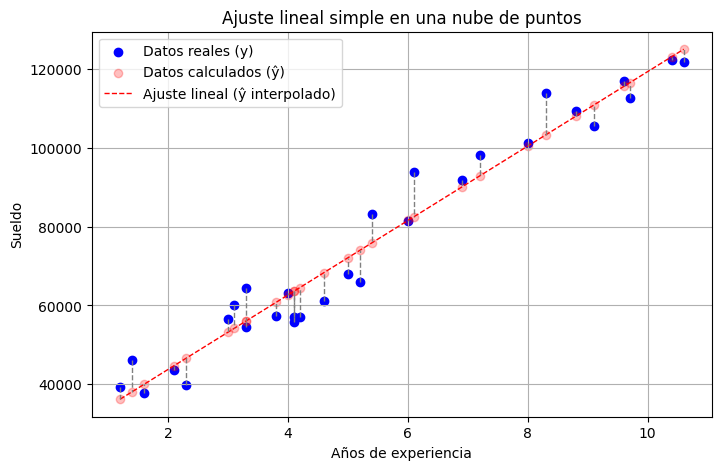

In [7]:
import numpy as np

# Realizar la regresión lineal
x = data['YearsExperience']
y = data['Salary']
A, B = np.polyfit(x, y, 1)

ŷ = A * x + B

# Graficar
plt.figure(figsize=(8, 5))
plt.scatter(x, y, c='blue', label='Datos reales (y)')
plt.scatter(x, ŷ, c='red', label='Datos calculados (ŷ)', alpha=0.25)
plt.plot(x, ŷ,  c='red', label='Ajuste lineal (ŷ interpolado)', linestyle='--', linewidth=1)

# Dibujar las líneas de error (líneas horizontales desde los datos reales hasta la línea de ajuste)
for xi, yi, yf in zip(x, y, ŷ):
    plt.plot([xi, xi], [yi, yf], c='gray', linestyle='--', linewidth=1)

plt.xlabel('Años de experiencia')  # Etiqueta del eje x
plt.ylabel('Sueldo')  # Etiqueta del eje y
plt.title('Ajuste lineal simple en una nube de puntos')
plt.legend()
plt.grid(True)
plt.show()

El método $np.polyfit$ ha calculado para nosotros los parámetros del modelo (los términos $A$ y $B$ de $A*x_1+B=y$), y los ha calculado para minimizar el error que se produce:

*   Por ejemplo, para **x=6.0** tenemos que **y=81547.97789525367**, cuando realmente los datos dicen que es **81364.0**
*   En otro caso, para **x=2.3** tenemos que **y=46583.11730586988**, cuando realmente los datos dicen que es **39892.0**

En efecto, al generalizar a partir de unos datos, generamos un error. Pero un error conocido.

Vamos a calcular el error al tomar como modelo esta línea.

Una forma de calcular el error es usando la métrica MAE (Median Absolute Error) que se calcula medint elña fórmula

$$MAE(x,y) = \frac{1}{n}\sum_{i=1}^{n}|y_i-\hat y_i|$$

Textualmente es la media de los errores absolutos cometidos al tomar $\hat y$ como predición de $y$.


In [8]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y,ŷ)

print(f"El MAE es {round(mae,2)}");

El MAE es 4644.2


Pero hay otra métrica:
$$ RMSE(x,y)= \sqrt{\frac{1}{n}\sum_{i=1}^{n}{(y_i-\hat y_i)^2}}$$

In [9]:
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(y, ŷ))

print(f"El RMSE es {round(rmse,2)}");

El RMSE es 5592.04


MAE y RMSE tienen pros y contras. ¿Cuál es mejor? depende del modelo, mi consejo es que uses MAE excepto cuando tengas errroes atípicos ($outliers$) y uses RMSE

Vamos a generar dos rectas erróneas y calcular sus errores.

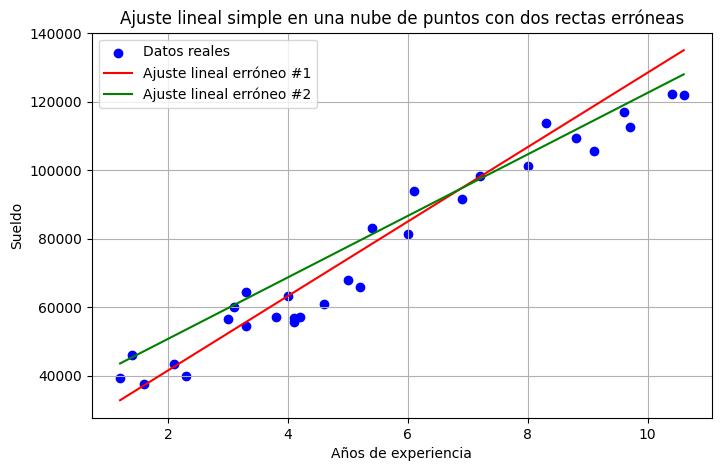

In [10]:
# Realizar la regresión lineal
x = data['YearsExperience']
y = data['Salary']
A, B = np.polyfit(x, y, 1)

ŷ1 = A*(1.15) * x + B - 5000
ŷ2 = A*(0.95) * x + B + 8000

# Graficar
plt.figure(figsize=(8, 5))
plt.scatter(x, y, c='blue', label='Datos reales')
plt.plot(x, ŷ1, c='red', label='Ajuste lineal erróneo #1')
plt.plot(x, ŷ2, c='green', label='Ajuste lineal erróneo #2')
plt.xlabel('Años de experiencia')  # Etiqueta del eje x
plt.ylabel('Sueldo')  # Etiqueta del eje y
plt.title('Ajuste lineal simple en una nube de puntos con dos rectas erróneas')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
mae1 = mean_absolute_error(y,ŷ1)
mae2 = mean_absolute_error(y,ŷ2)

print(f"El error en la predición #1 (mal) es {round(mae1,2)}")
print(f"El error en la predición correcta es {round(mae, 2)}")
print(f"El error en la predición #2 (mal) es {round(mae2,2)}")


El error en la predición #1 (mal) es 6326.33
El error en la predición correcta es 4644.2
El error en la predición #2 (mal) es 6648.49


Como puedes ver, otras rectas tienen errores superiores, aunque su error sea por defecto o por exceso.

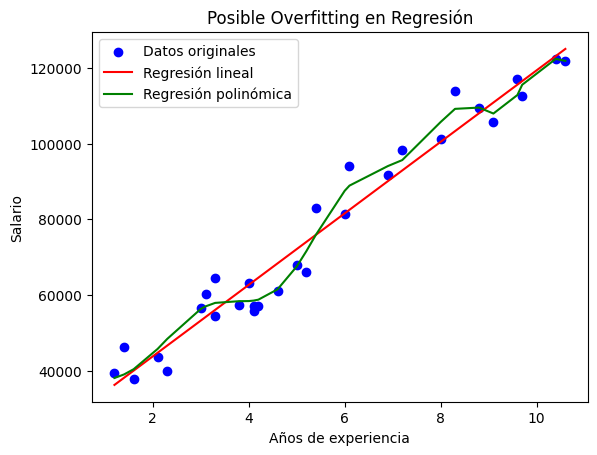

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Extrae las variables independientes y dependientes
X = data[['YearsExperience']]
y = data['Salary']

# Gráfico original de los datos
plt.scatter(X, y, color='blue', label='Datos originales')

# Regresión lineal simple
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
y_pred = linear_regressor.predict(X)
plt.plot(X, y_pred, color='red', label='Regresión lineal')

# Regresión polinómica (sobreajuste)
# Crea características polinómicas (digamos, de grado 15 para provocar un overfitting)
poly = PolynomialFeatures(degree=15)
X_poly = poly.fit_transform(X)  # Aquí debería funcionar ahora

# Ajusta el modelo polinómico
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y)
y_poly_pred = poly_regressor.predict(X_poly)

# Ordena los datos para el gráfico
sorted_order = np.argsort(X.iloc[:, 0])
X_sorted = X.iloc[sorted_order, :]
y_poly_sorted = y_poly_pred[sorted_order]

plt.plot(X_sorted, y_poly_sorted, color='green', label='Regresión polinómica')

plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.title('Posible Overfitting en Regresión')
plt.legend()
plt.show()
